In [2]:
import pandas as pd
import tensorflow as tf
print(tf.__version__) #2.13.0

2.13.0


In [3]:
!pip install scipy

E0000 00:00:1745893900.281601    1070 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745893900.285139    1070 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745893900.294301    1070 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745893900.294324    1070 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745893900.294326    1070 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745893900.294327    1070 computation_placer.cc:177] computation placer already registered. Please check linka

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
x_data의 shape : (20, 150, 150, 3)
t_data의 shape : (20,)
[0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0.]


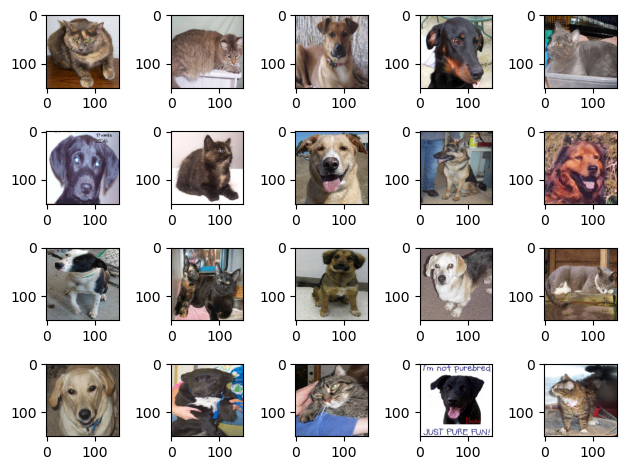

In [1]:

import os
from scipy import stats, optimize, signal
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dir='data/cat_dog_small/train'
validation_dir='data/cat_dog_small/validation'

# ImageDataGenerator생성
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# ImageDataGenerator설정
train_generator = train_datagen.flow_from_directory(
    train_dir,    # target directory
    classes=['cats', 'dogs'],  # cats, dogs 순서로 label을 0, 1로 사용
    target_size=(150,150),     # Image에 대한 size 변경
    batch_size=20,       # 한번에 20개의 이미지에 대한 pixel 정보를 가져와요!
                         # label에 상관없이 가져와요!
    class_mode='binary'  # 이진분류이면 binary, 다중분류인경우 categorical
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,    # target directory
    classes=['cats', 'dogs'],  # cats, dogs 순서로 label을 0, 1로 사용
    target_size=(150,150),     # Image에 대한 size 변경
    batch_size=20,       # 한번에 20개의 이미지에 대한 pixel 정보를 가져와요!
                         # label에 상관없이 가져와요!
    class_mode='binary'  # 이진분류이면 binary, 다중분류인경우 categorical
)

for x_data, t_data in train_generator:
    print(f'x_data의 shape : {x_data.shape}')  # (20, 150,150,3)
    print(f't_data의 shape : {t_data.shape}')  # (20,)
    break;

# generator를 이용해서 20장의 이미지를 출력해보세요!(4행5열)
fig = plt.figure()
axs = []

for i in range(20):
    axs.append(fig.add_subplot(4,5,i+1))

for x_data, t_data in train_generator:
    # print(f'x_data의 shape : {x_data.shape}')  # (20, 150,150,3)
    for idx, img_data in enumerate(x_data):
        axs[idx].imshow(img_data)    
    print(t_data)
    break;

plt.tight_layout()
plt.show()

In [2]:
#모델 구현
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam ,SGD, RMSprop
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import pandas as pd
import numpy as np
model = Sequential()

model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 activation='relu',
                 padding='same',
                 strides=(1,1),
                 input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 padding='same',
                 activation='relu',
                 strides=(1,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 padding='valid',
                 activation='relu',
                 strides=(1,1)))
model.add(Conv2D(filters=256,
                 kernel_size=(3,3),
                 padding='valid',
                 activation='relu',
                 strides=(1,1)))

model.add(Flatten())
model.add(Dropout(rate=0.5))

model.add(Dense(units=256, kernel_regularizer=l2(0.1)))
model.add(BatchNormalization())
model.add(Activation('relu'))

# 이진 분류니까 sigmoid로 바꿈
model.add(Dense(units=1, activation='sigmoid'))

model.summary()
model.compile(optimizer=RMSprop(learning_rate=1e-4),
             loss='binary_crossentropy',
             metrics=['accuracy'])


/home/eva/anaconda3/envs/tf_gpu/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
E0000 00:00:1745893903.871101    1070 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1745893903.890676    1070 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 35, 35, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 33, 33, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 278784)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 278784)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    71,368,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,758,657 (273.74 MB)

 Trainable params: 71,758,145 (273.74 MB)

 Non-trainable params: 512 (2.00 KB)

In [3]:
history = model.fit(train_generator,
                   steps_per_epoch=100,
                   epochs=30,
                   validation_data=validation_generator,
                   validation_steps=50) #20 batch로 했기 때문에 14000개를 가지고 학습을 하려면 700개 필요

Epoch 1/30


/home/eva/anaconda3/envs/tf_gpu/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 49s 482ms/step - accuracy: 0.5556 - loss: 27.2610 - val_accuracy: 0.5410 - val_loss: 5.0058
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 48s 479ms/step - accuracy: 0.7733 - loss: 3.4658 - val_accuracy: 0.6410 - val_loss: 1.8869
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 47s 472ms/step - accuracy: 0.8081 - loss: 1.4989 - val_accuracy: 0.6230 - val_loss: 1.5808
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 50s 497ms/step - accuracy: 0.8353 - loss: 1.2507 - val_accuracy: 0.6870 - val_loss: 1.4627
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 54s 542ms/step - accuracy: 0.8129 - loss: 1.2267 - val_accuracy: 0.6880 - val_loss: 1.3796
Epoch 6/30
 37/100 ━━━━━━━━━━━━━━━━━━━━ 29s 473ms/step - accuracy: 0.8415 - loss: 1.1439

KeyboardInterrupt: 

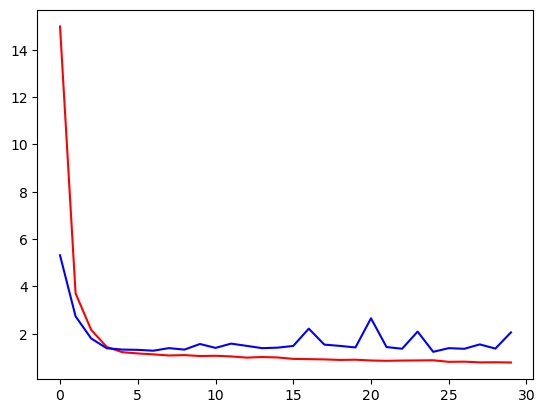

In [9]:
trian_loss=history.history['loss']
val_loss=history.history['val_loss']
plt.plot(trian_loss, color='r')
plt.plot(val_loss, color='b')


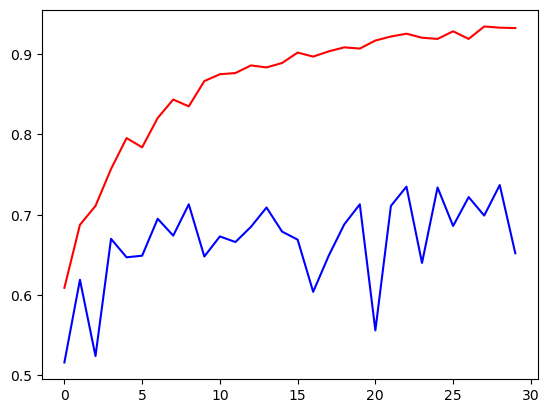

In [10]:
trian_loss=history.history['accuracy']
val_loss=history.history['val_accuracy']
plt.plot(trian_loss, color='r')
plt.plot(val_loss, color='b')
